In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataLink = "https://data.cityofchicago.org/resource/t7ek-mgzi.json?$order=id&$limit=10000&$offset=0"
try:
    data = pd.read_json(dataLink)
    print("Data loaded successfully.")
    dataDF = pd.DataFrame(data)
except Exception as e:
    print("Error loading data:", str(e))
    

Data loaded successfully.


In [12]:
data.shape

(10000, 22)

In [16]:
if "primary_type" in data.columns:
    # Group by crime type, count occurrences, and sort
    crime_counts = data["primary_type"].value_counts().reset_index()
    crime_counts.columns = ["Crime Type", "Count"]

    # Display result
    print(crime_counts)
else:
    print("Column 'primary_type' not found in the dataset.")

                           Crime Type  Count
0                               THEFT   2203
1                             BATTERY   1751
2                     CRIMINAL DAMAGE   1030
3                             ASSAULT    882
4                       OTHER OFFENSE    857
5                 MOTOR VEHICLE THEFT    689
6                           NARCOTICS    500
7                  DECEPTIVE PRACTICE    464
8                             ROBBERY    352
9                            BURGLARY    338
10                  WEAPONS VIOLATION    320
11                  CRIMINAL TRESPASS    237
12            CRIMINAL SEXUAL ASSAULT     62
13                           HOMICIDE     55
14         OFFENSE INVOLVING CHILDREN     52
15   INTERFERENCE WITH PUBLIC OFFICER     48
16                        SEX OFFENSE     43
17             PUBLIC PEACE VIOLATION     33
18                              ARSON     23
19                           STALKING     16
20  CONCEALED CARRY LICENSE VIOLATION     15
21        

In [15]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28268 entries, 0 to 28267
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    28268 non-null  int64         
 1   case_number           28268 non-null  object        
 2   date                  28268 non-null  datetime64[ns]
 3   block                 28268 non-null  object        
 4   iucr                  28268 non-null  object        
 5   primary_type          28268 non-null  object        
 6   description           28268 non-null  object        
 7   location_description  28204 non-null  object        
 8   arrest                28268 non-null  bool          
 9   domestic              28268 non-null  bool          
 10  beat                  28268 non-null  int64         
 11  district              28268 non-null  int64         
 12  ward                  28268 non-null  int64         
 13  community_area  

In [14]:
print(data.head())

      id case_number                date                     block  iucr  \
0  28545    JJ100205 2025-01-01 03:57:00       094XX S HARVARD AVE  0110   
1  28546    JJ100293 2025-01-01 06:10:00  022XX S CENTRAL PARK AVE  0110   
2  28547    JJ100596 2025-01-01 14:06:00        075XX S RACINE AVE  0110   
3  28548    JJ100160 2025-01-02 01:18:00        012XX S SAWYER AVE  0110   
4  28549    JJ100988 2025-01-01 20:15:00       015XX W WARREN BLVD  0110   

  primary_type          description location_description  arrest  domestic  \
0     HOMICIDE  FIRST DEGREE MURDER                 YARD   False     False   
1     HOMICIDE  FIRST DEGREE MURDER            APARTMENT    True      True   
2     HOMICIDE  FIRST DEGREE MURDER               TAVERN   False     False   
3     HOMICIDE  FIRST DEGREE MURDER                HOUSE    True      True   
4     HOMICIDE  FIRST DEGREE MURDER            APARTMENT    True     False   

   ...  ward  community_area  fbi_code  x_coordinate y_coordinate  year  \

In [13]:
print(data.tail())

             id case_number                date                 block  iucr  \
28263  13760161    JJ163061 2025-01-29 12:00:00  078XX S EXCHANGE AVE  0915   
28264  13760168    JJ162055 2025-01-15 00:00:00    073XX S RACINE AVE  1562   
28265  13760202    JJ163210 2025-02-18 00:01:00  049XX S MICHIGAN AVE  0610   
28266  13760249    JJ163218 2025-01-05 02:00:00      035XX N CLARK ST  0810   
28267  13760376    JJ161260 2025-02-15 18:00:00    079XX S NORMAL AVE  0820   

              primary_type                       description  \
28263  MOTOR VEHICLE THEFT            TRUCK, BUS, MOTOR HOME   
28264          SEX OFFENSE  AGGRAVATED CRIMINAL SEXUAL ABUSE   
28265             BURGLARY                    FORCIBLE ENTRY   
28266                THEFT                         OVER $500   
28267                THEFT                    $500 AND UNDER   

                  location_description  arrest  domestic  ...  ward  \
28263  OTHER COMMERCIAL TRANSPORTATION   False     False  ...     7  

In [16]:
print(data.describe(include='all'))

                  id case_number                           date  \
count   2.826800e+04       28268                          28268   
unique           NaN       28264                            NaN   
top              NaN    JJ145827                            NaN   
freq             NaN           2                            NaN   
mean    1.370612e+07         NaN  2025-01-25 11:50:11.977500928   
min     2.854500e+04         NaN            2025-01-01 00:00:00   
25%     1.372041e+07         NaN            2025-01-13 01:10:00   
50%     1.373195e+07         NaN            2025-01-25 18:41:30   
75%     1.374325e+07         NaN            2025-02-06 15:00:00   
max     1.376038e+07         NaN            2025-02-20 00:00:00   
std     5.929575e+05         NaN                            NaN   

                   block   iucr primary_type description location_description  \
count              28268  28268        28268       28268                28204   
unique             12876    264  

In [ ]:
print(data.isna().sum())

id                       0
case_number              0
date                     0
block                    0
iucr                     0
primary_type             0
description              0
location_description    64
arrest                   0
domestic                 0
beat                     0
district                 0
ward                     0
community_area           0
fbi_code                 0
x_coordinate            65
y_coordinate            65
year                     0
updated_on               0
latitude                65
longitude               65
location                65
dtype: int64


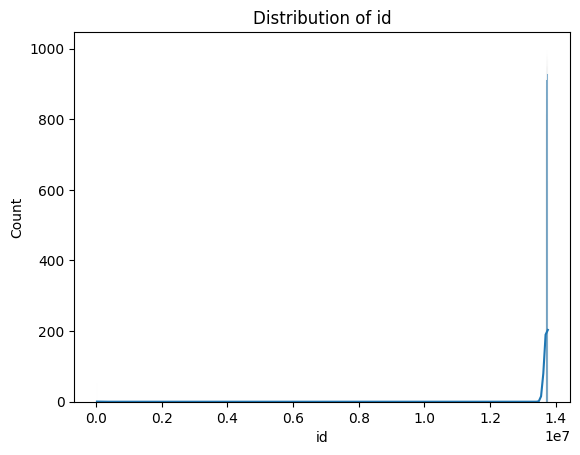

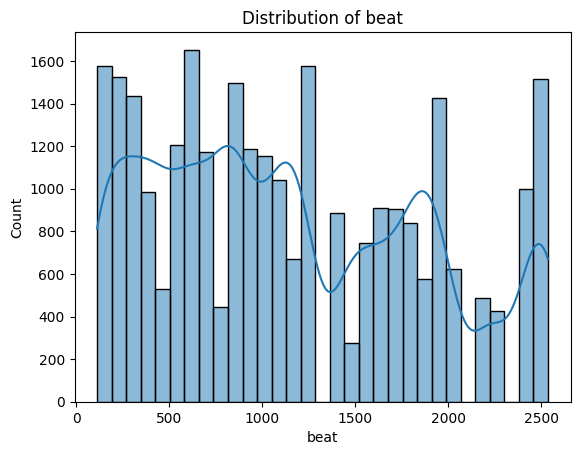

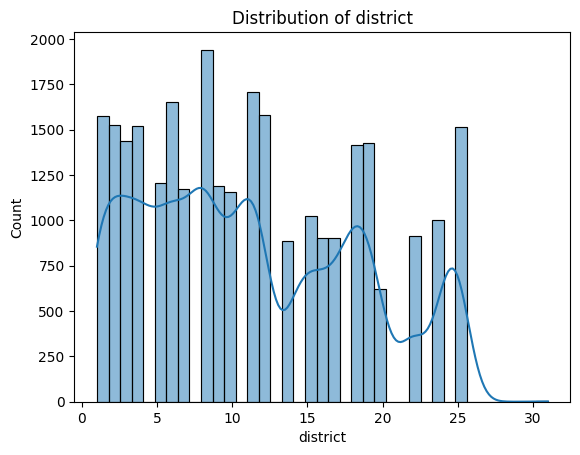

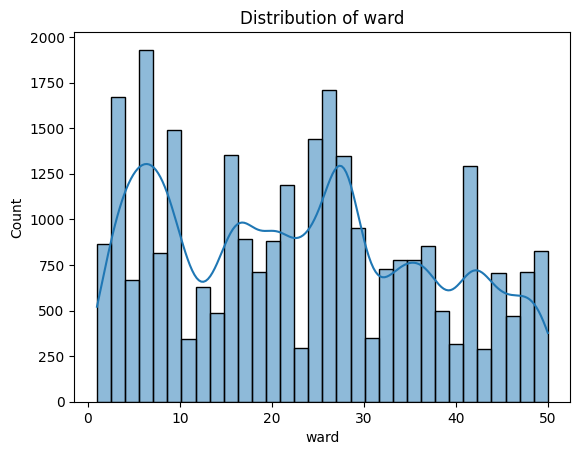

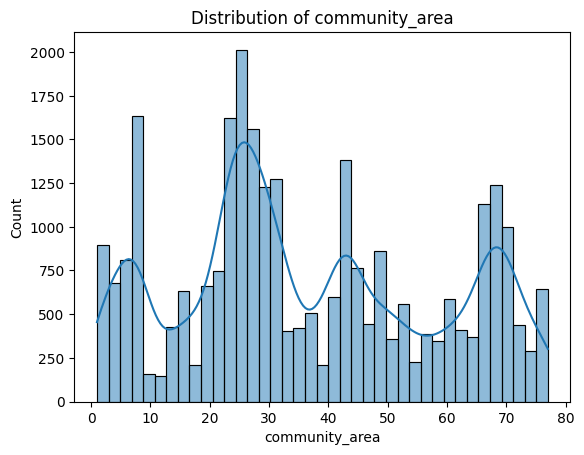

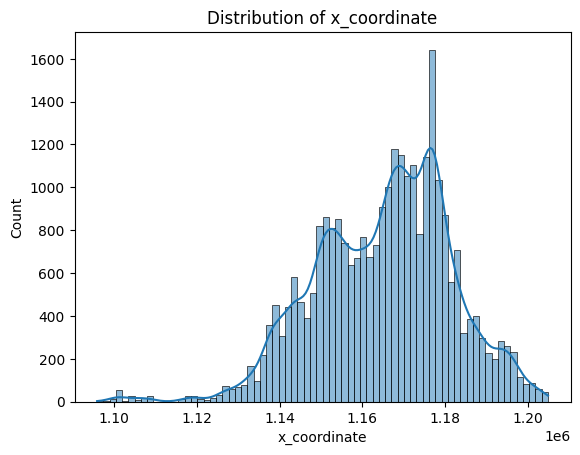

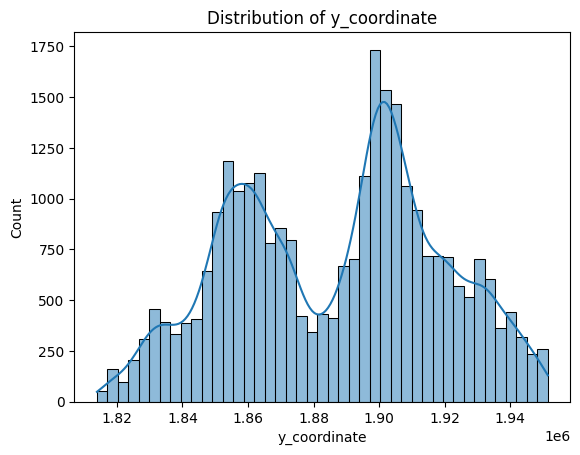

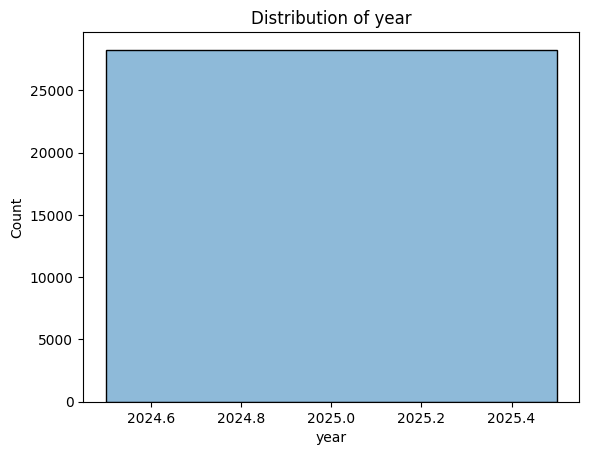

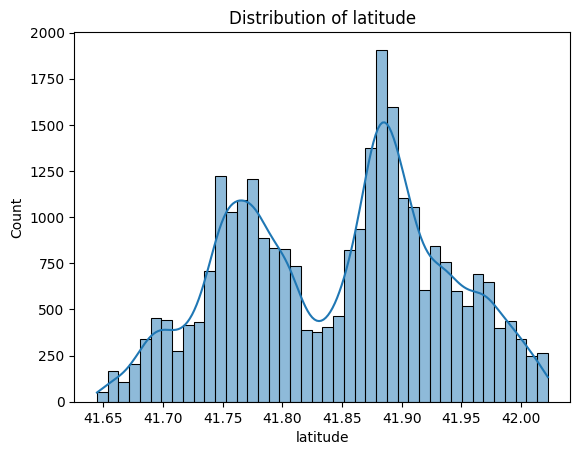

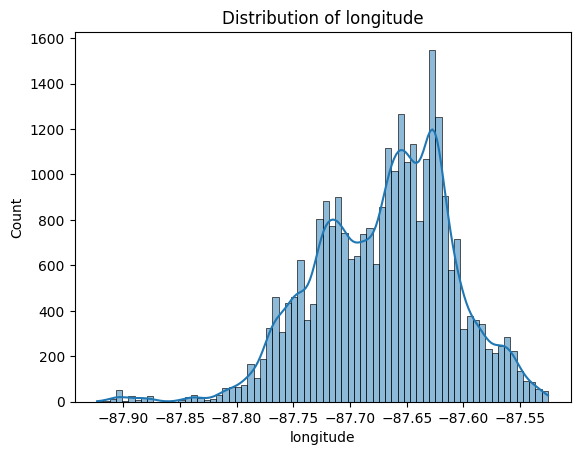

In [23]:
    for col in data.select_dtypes(include=['number']).columns:
        plt.figure()
        sns.histplot(data[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()

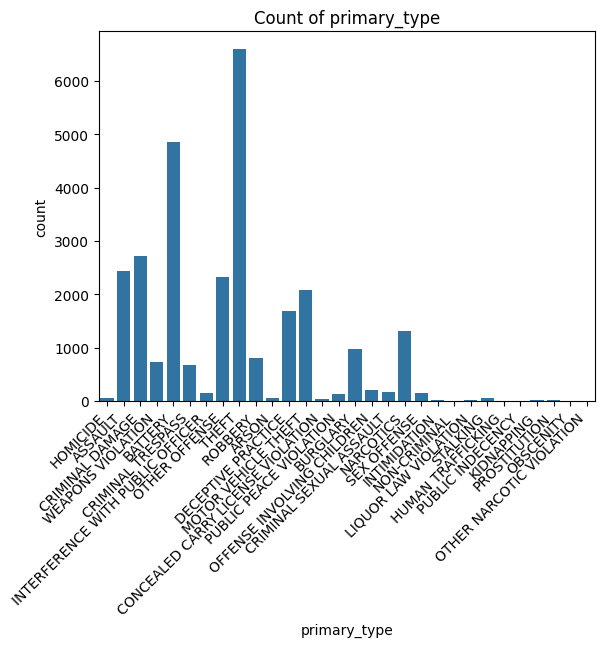

In [27]:
        plt.figure()
        sns.countplot(x='primary_type', data=data)
        plt.title(f'Count of {'primary_type'}')
        plt.xticks(rotation=45, ha='right')
        plt.show()

<Axes: ylabel='fbi_code'>

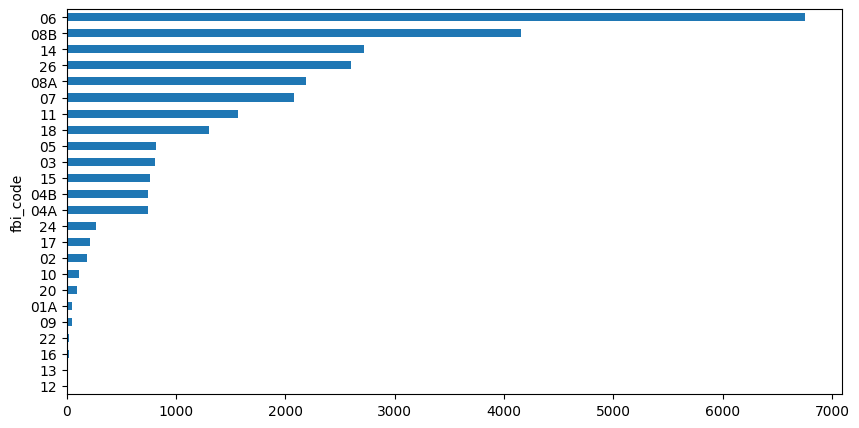

In [63]:
data['fbi_code'].value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(10, 5))

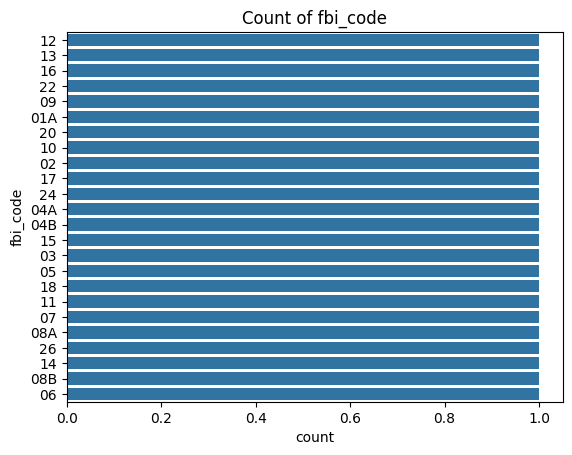

In [ ]:
        data_fbi_code = data['fbi_code'].value_counts().sort_values(ascending=True).to_frame()
        data_fbi_code.columns = ['count']    
        plt.figure()
        sns.countplot(y='fbi_code', data=data_fbi_code)
        plt.title(f'Count of {'fbi_code'}')
        plt.yticks(rotation=0, ha='right')
        plt.show()

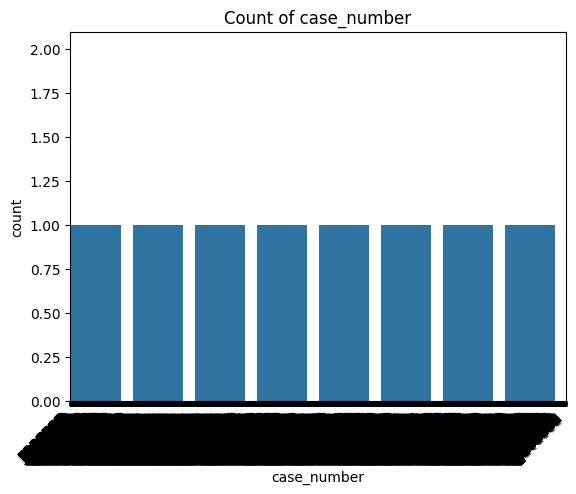

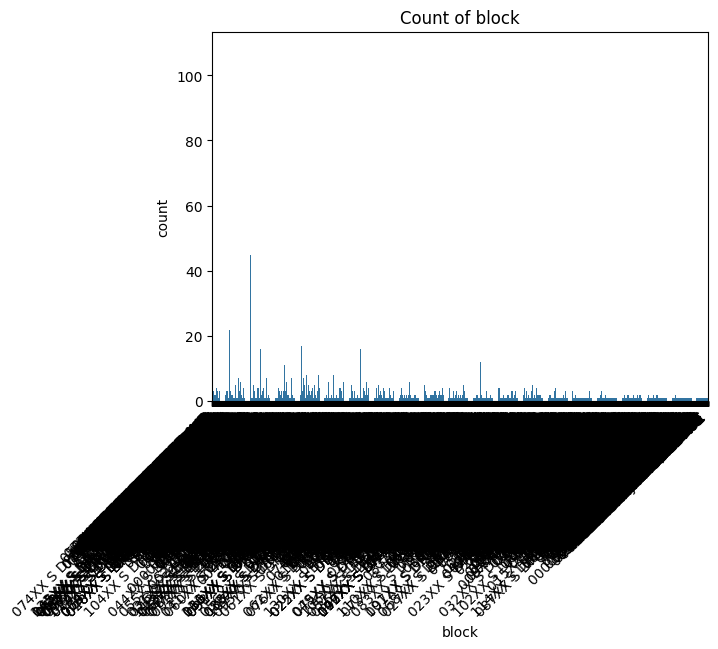

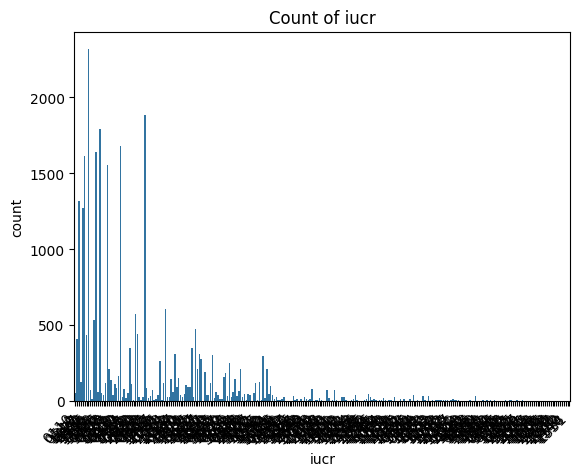

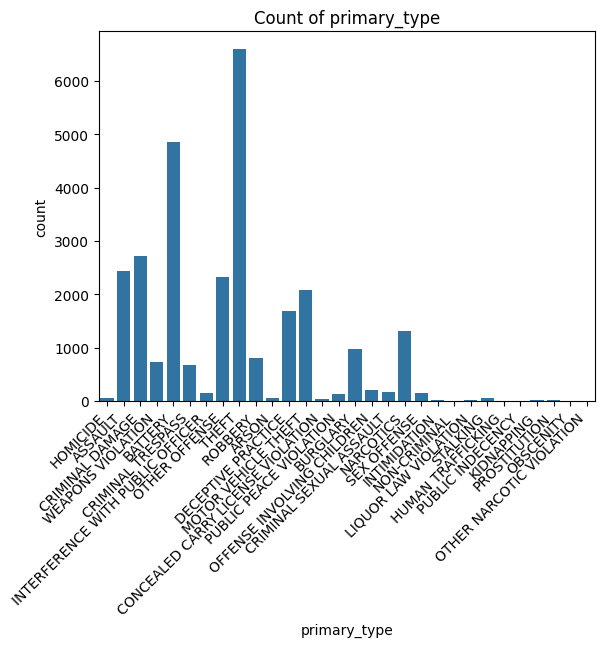

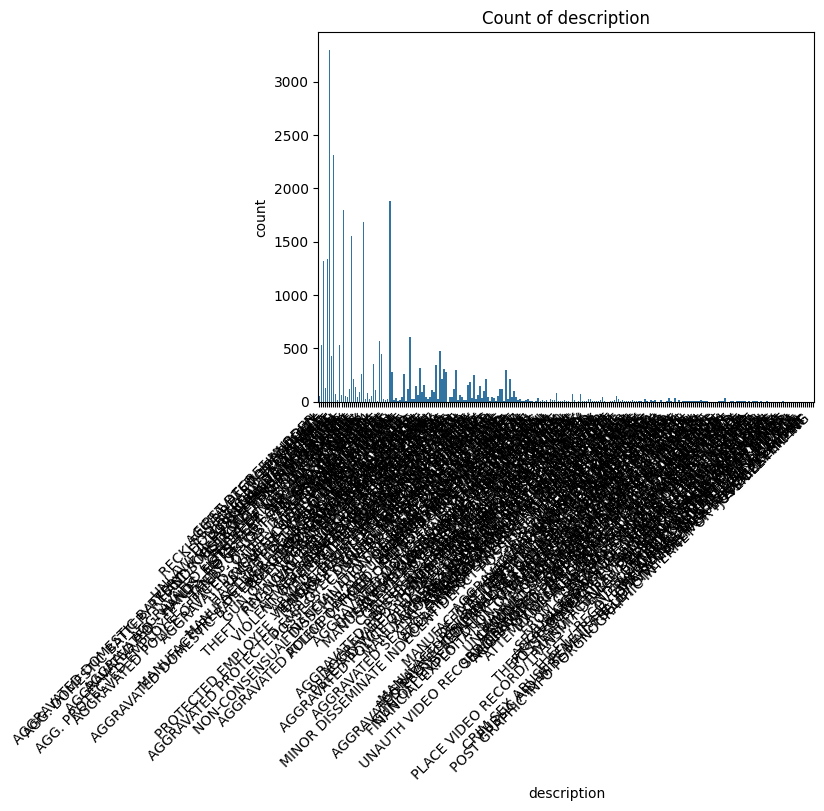

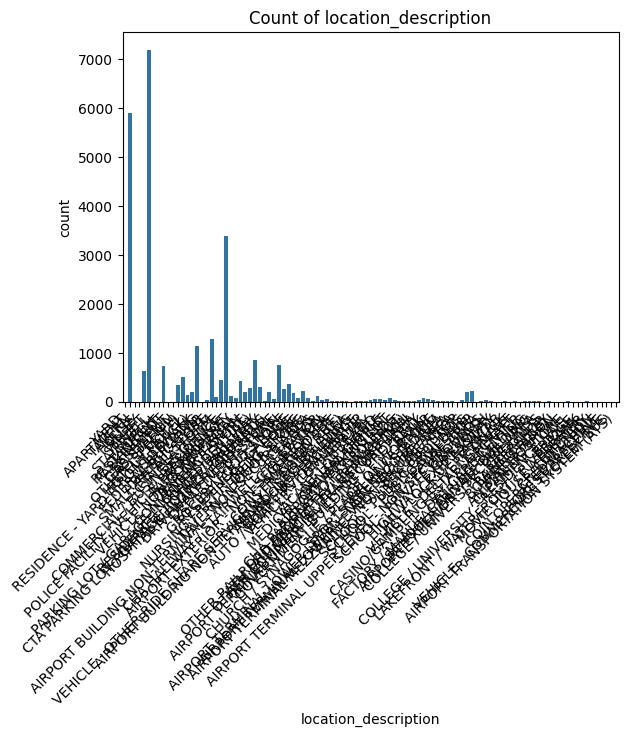

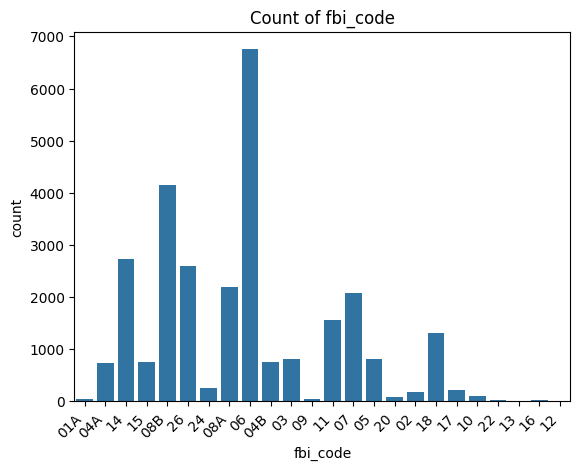

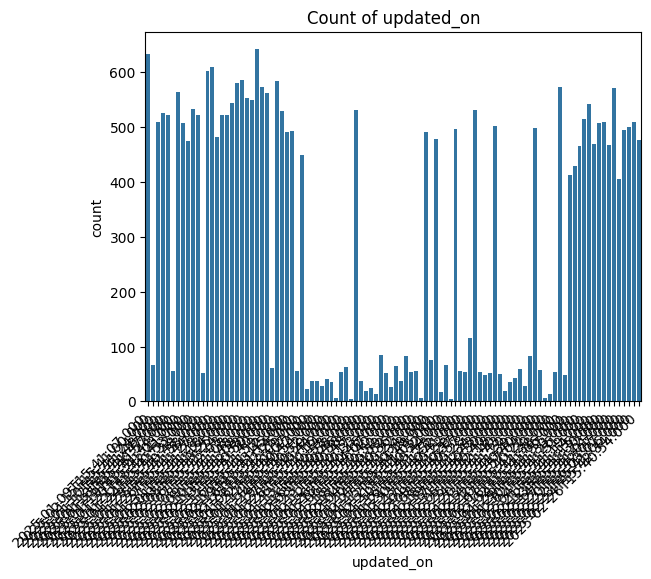

TypeError: unhashable type: 'dict'

<Figure size 640x480 with 0 Axes>

In [25]:
    for col in data.select_dtypes(include=['object']).columns:
        plt.figure()
        sns.countplot(x=col, data=data)
        plt.title(f'Count of {col}')
        plt.xticks(rotation=45, ha='right')
        plt.show()

In [ ]:
    numeric_cols = data.select_dtypes(include=['number']).columns
    if len(numeric_cols) > 1:
        plt.figure()
        sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm')
        plt.title('Correlation Heatmap')
        plt.show()


In [76]:
# First and last dates in the dataset
first_date = data['date'].min()
last_date = data['date'].max()
print(f'First date: {first_date}')
print(f'Last date: {last_date}')

First date: 2025-01-01 00:00:00
Last date: 2025-02-20 00:00:00


In [3]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Chicago Crime Data Dashboard"),

    dcc.Dropdown(
        id='crime-type-dropdown',
        options=[{'label': i, 'value': i} for i in data['primary_type'].unique()],
        value='THEFT'
    ),

    dcc.Graph(id='crime-type-bar-chart'),
    
    dcc.Graph(id='crime-location-bar-chart')
])

@app.callback(
    Output('crime-type-bar-chart', 'figure'),
    [Input('crime-type-dropdown', 'value')]
)
def update_crime_type_bar_chart(selected_crime_type):
    filtered_data = data[data['primary_type'] == selected_crime_type]
    crime_counts = filtered_data['location_description'].value_counts().reset_index()
    crime_counts.columns = ['location_description', 'count']
    fig = px.bar(crime_counts, x='location_description', y='count', title=f'Crime Locations for {selected_crime_type}')
    return fig

@app.callback(
    Output('crime-location-bar-chart', 'figure'),
    [Input('crime-type-dropdown', 'value')]
)
def update_crime_location_bar_chart(selected_crime_type):
    filtered_data = data[data['primary_type'] == selected_crime_type]
    crime_counts = filtered_data['community_area'].value_counts().reset_index()
    crime_counts.columns = ['community_area', 'count']
    fig = px.bar(crime_counts, x='community_area', y='count', title=f'Crime Community Area for {selected_crime_type}')
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)
